In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from stldecompose import decompose
from statsmodels.tsa import arima_model

%matplotlib inline
sns.set(rc={'figure.figsize':(25,10)})

#sns.set(rc={'figure.figsize':(25,10)})

In [2]:
sns.set(rc={'figure.figsize':(25,10)})

In [3]:
pd.to_datetime('2018-10-20 22:16:16')

Timestamp('2018-10-20 22:16:16')

In [4]:
pd.to_datetime('2018-10-20T22:16:16Z') #ISO 8601

Timestamp('2018-10-20 22:16:16+0000', tz='UTC')

In [5]:
pd.to_datetime('2018-10-20 22:16:16',utc=True)

Timestamp('2018-10-20 22:16:16+0000', tz='UTC')

In [9]:
pd.to_datetime('31/7/2007') #dd/mm/yy

Timestamp('2007-07-31 00:00:00')

In [10]:
pd.to_datetime('7/31/2007') #dd/mm/yy

Timestamp('2007-07-31 00:00:00')

In [11]:
pd.to_datetime('7/31/2007', dayfirst=True) #dd/mm/yy

Timestamp('2007-07-31 00:00:00')

In [3]:
pd.date_range(start='2019/01/01', freq='1B', periods=26)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# D es daily, B es business daily, M month, Q quaterly, etc.

In [19]:
pd.timedelta_range(start='1 day', end= '5 day', periods=6)

TimedeltaIndex(['1 days 00:00:00', '1 days 19:12:00', '2 days 14:24:00',
                '3 days 09:36:00', '4 days 04:48:00', '5 days 00:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [20]:
pd.timedelta_range(start='1 day', periods=6, freq='H')

TimedeltaIndex(['1 days 00:00:00', '1 days 01:00:00', '1 days 02:00:00',
                '1 days 03:00:00', '1 days 04:00:00', '1 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [4]:
data = pd.read_excel('muestra.xls')

In [5]:
data.head()

Id. de la fila  Id. del pedido Fecha del pedido Fecha de envío  \
0               1  MX-2018-143658       2018-10-02     2018-10-06   
1               2  MX-2016-155047       2016-10-16     2016-10-21   
2               3  MX-2016-155047       2016-10-16     2016-10-21   
3               4  MX-2016-155047       2016-10-16     2016-10-21   
4               5  MX-2016-155047       2016-10-16     2016-10-21   

  Forma de envío Id. del cliente Nombre del cliente Segmento  \
0       Estándar        RC-20575         Reyes Coto  Cliente   
1       Estándar        IG-16570         Iván Girón  Cliente   
2       Estándar        IG-16570         Iván Girón  Cliente   
3       Estándar        IG-16570         Iván Girón  Cliente   
4       Estándar        IG-16570         Iván Girón  Cliente   

             Ciudad            Estado      País Región Id. del producto  \
0  Ciudad de México  Distrito Federal    México  Norte  MAT-ET-10000866   
1     Dos Quebradas         Risaralda  Colombia    Sur  MOB-MO-10000543   
2     Dos Quebradas         Risaralda  Colombia    Sur  MOB-LI-10000111   
3     Dos Quebradas         Risaralda  Colombia    Sur  MAT-CA-10004211   
4     Dos Quebradas         Risaralda  Colombia    Sur  MAT-AR-10001135   

             Categoría Subcategoría  \
0  Material de oficina    Etiquetas   
1           Mobiliario   Mobiliario   
2           Mobiliario    Librerías   
3  Material de oficina     Carpetas   
4  Material de oficina         Arte   

                                 Nombre del producto   Total  Cantidad  \
0  Hon Etiquetas para carpetas de archivos, Ajust...   130.8         3   
1                              Tenex Reloj, Duradero  2521.6         8   
2                               Ikea Vitrina, Blanco  1932.8         2   
3                     Cardinal Carpeta, Transparente   354.4         4   
4                  Sanford Lienzos, Tamaños variados   716.0         2   

   Descuento  Ganancia  
0        0.0      45.6  
1        0.0     907.2  
2        0.0     540.8  
3        0.0      49.6  
4        0.0     114.4

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 20 columns):
Id. de la fila         10288 non-null int64
Id. del pedido         10288 non-null object
Fecha del pedido       10288 non-null datetime64[ns]
Fecha de envío         10288 non-null datetime64[ns]
Forma de envío         10288 non-null object
Id. del cliente        10288 non-null object
Nombre del cliente     10288 non-null object
Segmento               10288 non-null object
Ciudad                 10288 non-null object
Estado                 10288 non-null object
País                   10288 non-null object
Región                 10288 non-null object
Id. del producto       10288 non-null object
Categoría              10288 non-null object
Subcategoría           10288 non-null object
Nombre del producto    10288 non-null object
Total                  10288 non-null float64
Cantidad               10288 non-null int64
Descuento              10288 non-null float64
Ganancia            

In [26]:
data.describe()

Id. de la fila         Total      Cantidad     Descuento      Ganancia
count    10288.000000  10288.000000  10288.000000  10288.000000  10288.000000
mean      5144.500000   2103.767977      3.742710      0.135260    215.619571
std       2970.034119   3491.500914      2.200417      0.195493   1188.219441
min          1.000000     15.660000      1.000000      0.000000 -18062.400000
25%       2572.750000    328.950000      2.000000      0.000000     -7.250000
50%       5144.500000    804.660000      3.000000      0.000000     80.400000
75%       7716.250000   2278.550000      5.000000      0.400000    326.450000
max      10288.000000  34740.800000     14.000000      0.800000  13132.800000

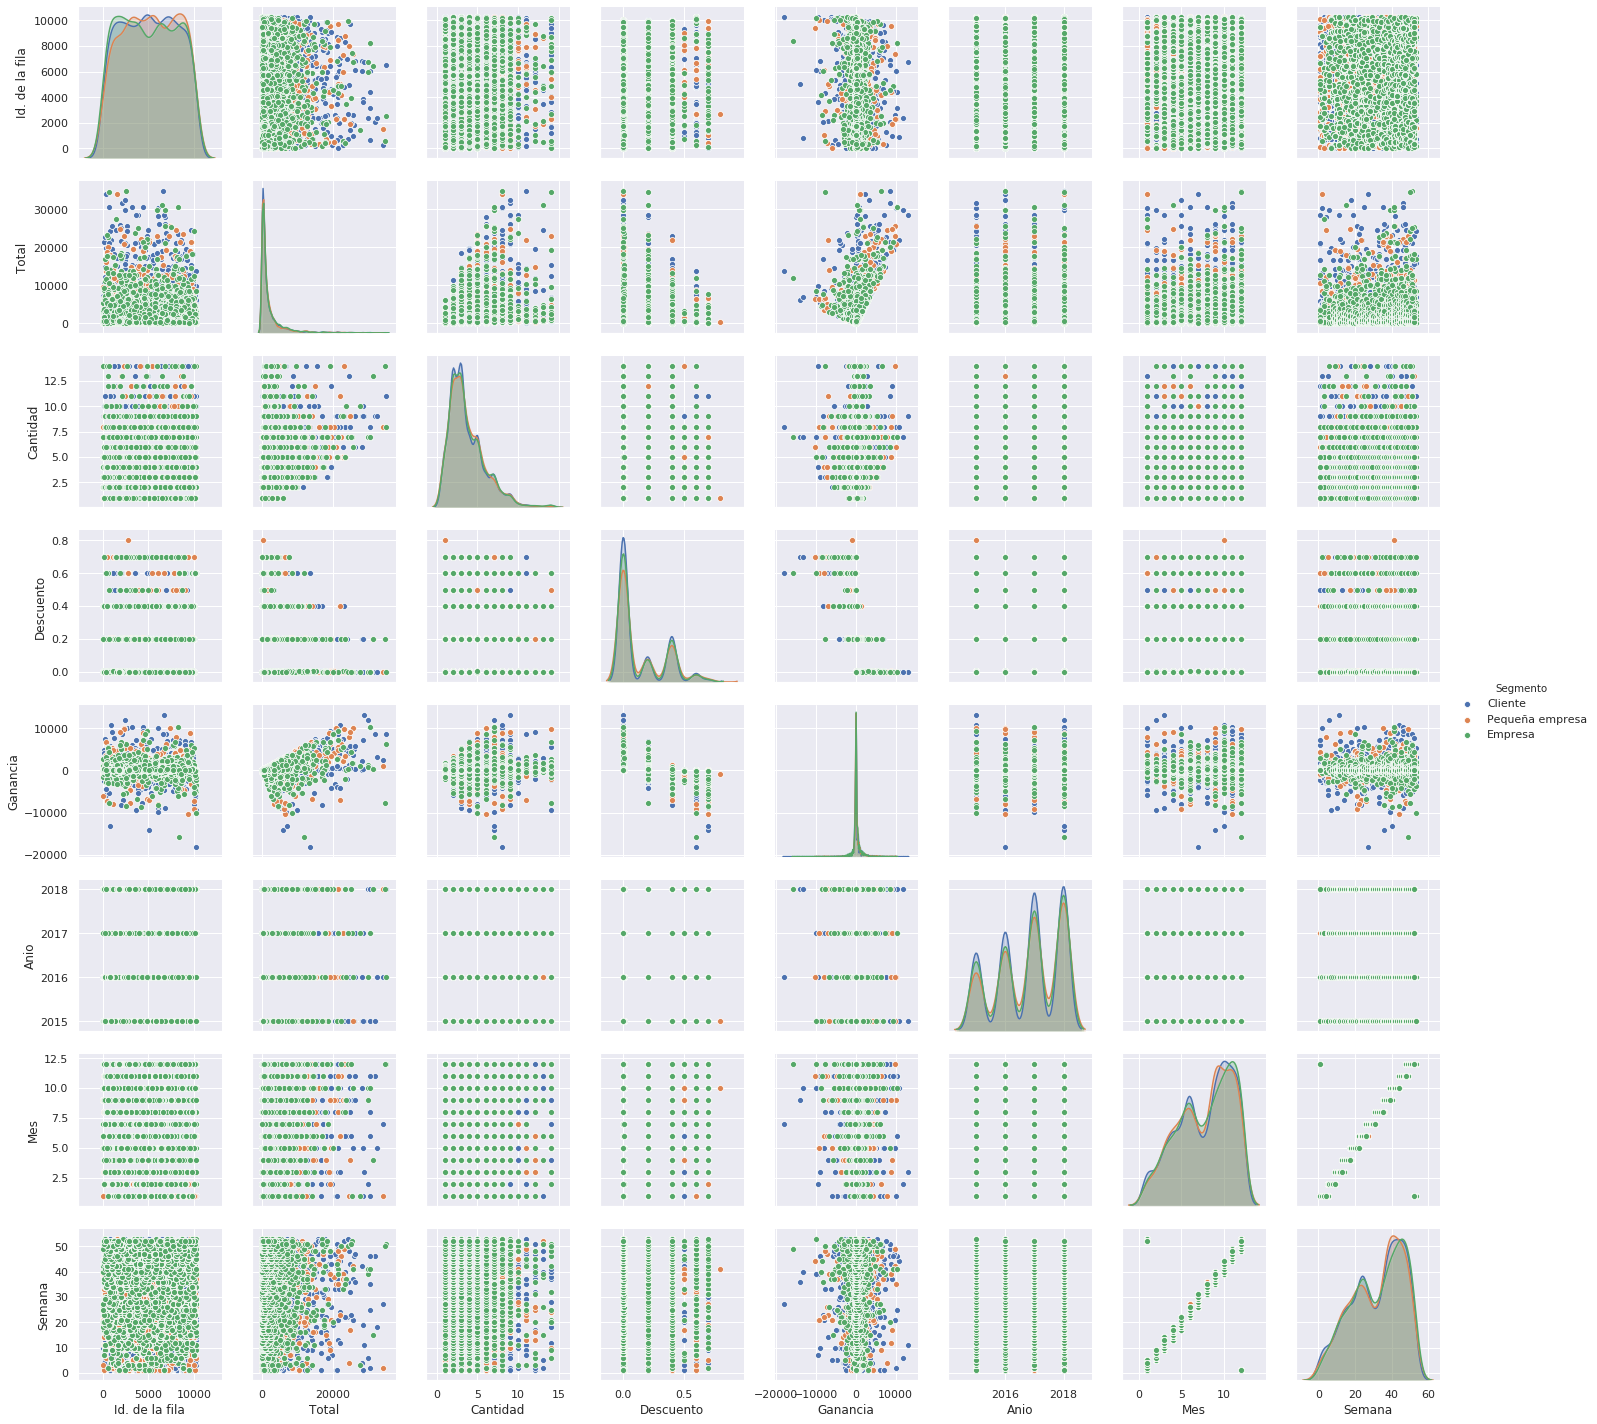

In [23]:
# Drop rows with missing values and drop duplicate
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Visualize pairplot of df
sns.pairplot(data, hue='Segmento');

In [6]:
data = data.set_index('Fecha del pedido')
data = data.sort_index()
data.head()

Id. de la fila  Id. del pedido Fecha de envío  \
Fecha del pedido                                                  
2015-01-03                  8187  MX-2015-160234     2015-01-07   
2015-01-04                 10118  US-2015-136007     2015-01-11   
2015-01-04                  1971  MX-2015-111255     2015-01-09   
2015-01-04                  1970  MX-2015-111255     2015-01-09   
2015-01-04                  9067  MX-2015-159373     2015-01-08   

                 Forma de envío Id. del cliente Nombre del cliente  \
Fecha del pedido                                                     
2015-01-03             Estándar        SC-20785      Sandra Crespo   
2015-01-04             Estándar        AH-11305  Ariadna Hernández   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04             Estándar        AC-10930   Anabel Caraballo   

                         Segmento             Ciudad            Estado  \
Fecha del pedido                                                         
2015-01-03                Cliente              Mixco         Guatemala   
2015-01-04        Pequeña empresa              Pilar           Alagoas   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04        Pequeña empresa   Santiago de Cuba  Santiago de Cuba   

                       País  Región Id. del producto            Categoría  \
Fecha del pedido                                                            
2015-01-03        Guatemala  Centro  TEC-TE-10001721           Tecnología   
2015-01-04           Brasil     Sur  MAT-SO-10002386  Material de oficina   
2015-01-04           Brasil     Sur  MOB-LI-10001117           Mobiliario   
2015-01-04           Brasil     Sur  MAT-SU-10003372  Material de oficina   
2015-01-04             Cuba  Caribe  MAT-SO-10000441  Material de oficina   

                 Subcategoría               Nombre del producto     Total  \
Fecha del pedido                                                            
2015-01-03          Teléfonos   Nokia Auriculares, Al por mayor   1952.00   
2015-01-04             Sobres   Jiffy Sobres de uso interno, 50    743.04   
2015-01-04          Librerías     Dania Librería clásica, Negro  16484.40   
2015-01-04        Suministros          Fiskars Abrecartas, Azul   1489.60   
2015-01-04             Sobres  Kraft Cierre adhesivo, Reciclado    385.80   

                  Cantidad  Descuento  Ganancia  
Fecha del pedido                                 
2015-01-03               4        0.0    448.80  
2015-01-04               6        0.6  -1078.56  
2015-01-04               6        0.0   6098.40  
2015-01-04               8        0.0    281.60  
2015-01-04               3        0.0     76.80

In [7]:
data['Anio'] = data.index.year
data['Mes'] = data.index.month
data['Semana'] = data.index.week
data['Dia_semana'] = data.index.day_name()

In [13]:
data['Dia_semana'].value_counts()

Monday       1894
Tuesday      1856
Sunday       1818
Wednesday    1724
Thursday     1642
Saturday      694
Friday        660
Name: Dia_semana, dtype: int64

In [17]:
data.head()

Id. de la fila  Id. del pedido Fecha de envío  \
Fecha del pedido                                                  
2015-01-03                  8187  MX-2015-160234     2015-01-07   
2015-01-04                 10118  US-2015-136007     2015-01-11   
2015-01-04                  1971  MX-2015-111255     2015-01-09   
2015-01-04                  1970  MX-2015-111255     2015-01-09   
2015-01-04                  9067  MX-2015-159373     2015-01-08   

                 Forma de envío Id. del cliente Nombre del cliente  \
Fecha del pedido                                                     
2015-01-03             Estándar        SC-20785      Sandra Crespo   
2015-01-04             Estándar        AH-11305  Ariadna Hernández   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04             Estándar        AC-10930   Anabel Caraballo   

                         Segmento             Ciudad            Estado  \
Fecha del pedido                                                         
2015-01-03                Cliente              Mixco         Guatemala   
2015-01-04        Pequeña empresa              Pilar           Alagoas   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04        Pequeña empresa   Santiago de Cuba  Santiago de Cuba   

                       País  ... Subcategoría  \
Fecha del pedido             ...                
2015-01-03        Guatemala  ...    Teléfonos   
2015-01-04           Brasil  ...       Sobres   
2015-01-04           Brasil  ...    Librerías   
2015-01-04           Brasil  ...  Suministros   
2015-01-04             Cuba  ...       Sobres   

                               Nombre del producto     Total Cantidad  \
Fecha del pedido                                                        
2015-01-03         Nokia Auriculares, Al por mayor   1952.00        4   
2015-01-04         Jiffy Sobres de uso interno, 50    743.04        6   
2015-01-04           Dania Librería clásica, Negro  16484.40        6   
2015-01-04                Fiskars Abrecartas, Azul   1489.60        8   
2015-01-04        Kraft Cierre adhesivo, Reciclado    385.80        3   

                 Descuento  Ganancia  Anio  Mes  Semana  Dia_semana  
Fecha del pedido                                                     
2015-01-03             0.0    448.80  2015    1       1    Saturday  
2015-01-04             0.6  -1078.56  2015    1       1      Sunday  
2015-01-04             0.0   6098.40  2015    1       1      Sunday  
2015-01-04             0.0    281.60  2015    1       1      Sunday  
2015-01-04             0.0     76.80  2015    1       1      Sunday  

[5 rows x 23 columns]

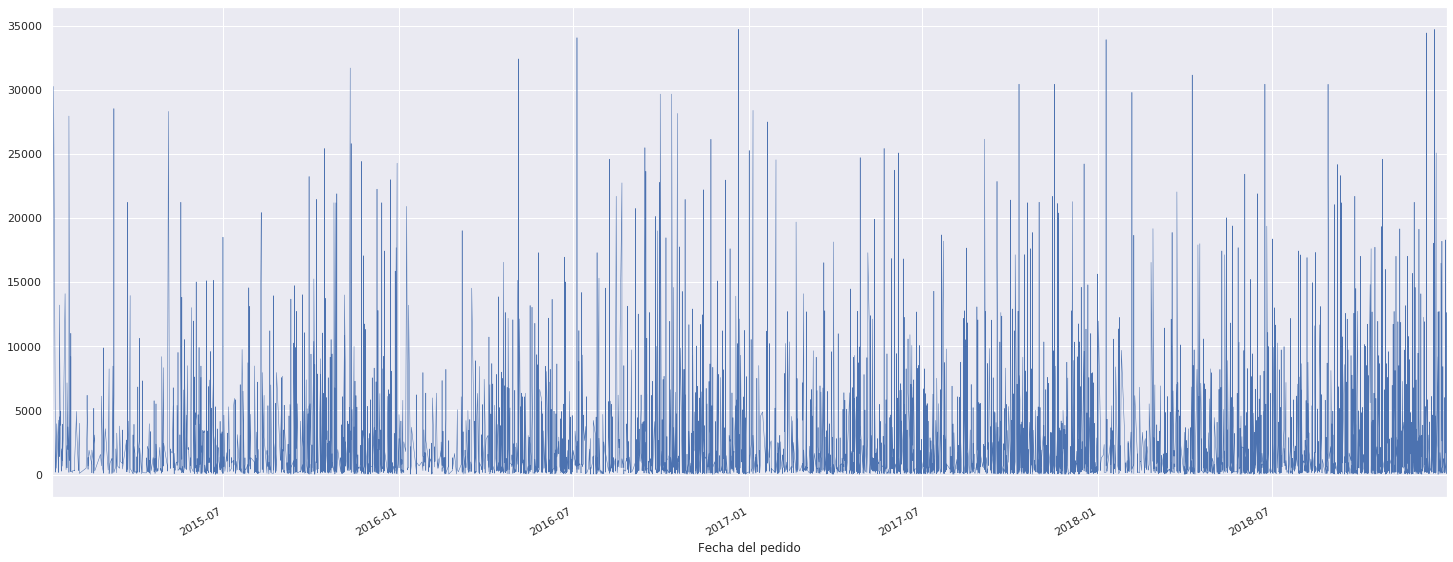

In [24]:
data['Total'].plot(linewidth=0.5)

In [20]:
df_g = data.groupby(["Fecha del pedido","Semana"])
df_g_sum = data.groupby(["Fecha del pedido","Semana"]).sum()

In [19]:
df_g_sum.head()

Id. de la fila       Total  Cantidad  Descuento  \
Fecha del pedido Semana                                                    
2015-01-03       1                 8187   1952.0000         4      0.000   
2015-01-04       1                60366  25602.5224        38      0.602   
2015-01-05       2                 6006  30288.0000         8      0.000   
2015-01-07       2                17917    615.8000         7      0.000   
2015-01-08       2                17131   4466.0000        10      0.000   

                          Ganancia   Anio  Mes  
Fecha del pedido Semana                         
2015-01-03       1        448.8000   2015    1  
2015-01-04       1       6132.5224  18135    9  
2015-01-05       2       9993.6000   2015    1  
2015-01-07       2         84.0000   4030    2  
2015-01-08       2       2028.2000   4030    2

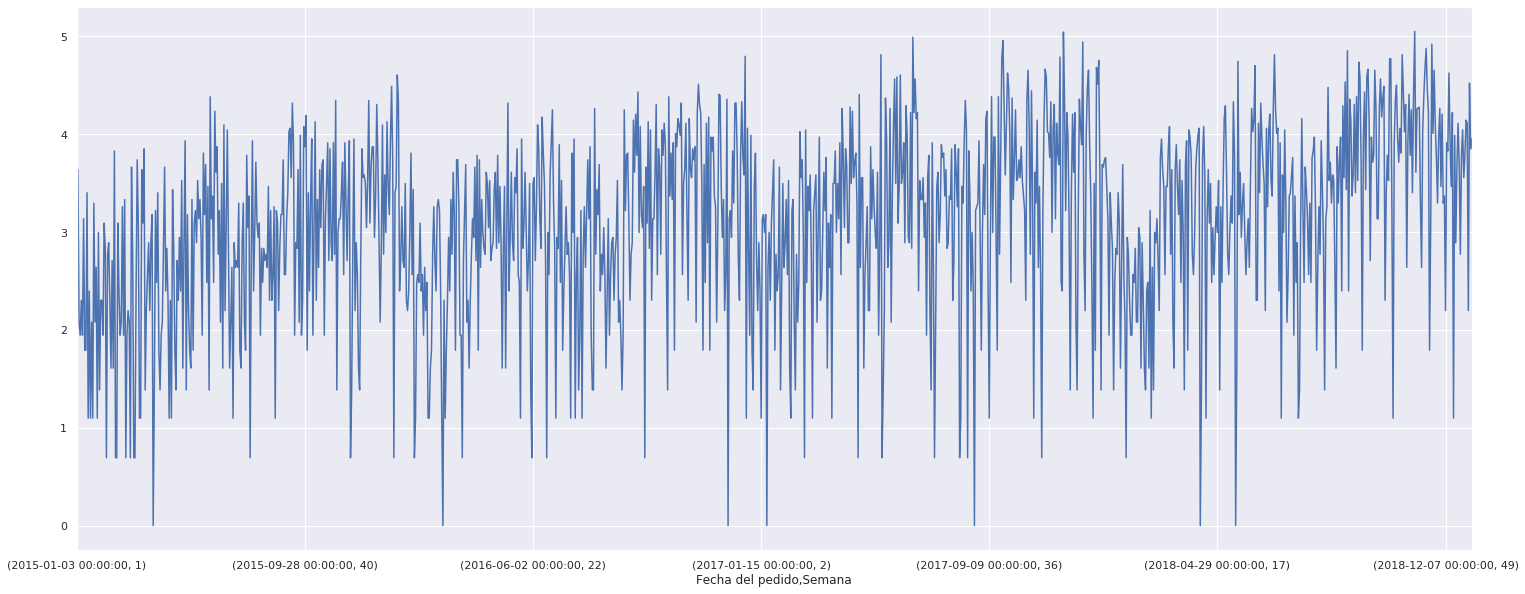

In [14]:
df_g_dem = df_g_sum['Cantidad']
np.log(df_g_dem).plot()

In [22]:
data.head()

Id. de la fila  Id. del pedido Fecha de envío  \
Fecha del pedido                                                  
2015-01-03                  8187  MX-2015-160234     2015-01-07   
2015-01-04                 10118  US-2015-136007     2015-01-11   
2015-01-04                  1971  MX-2015-111255     2015-01-09   
2015-01-04                  1970  MX-2015-111255     2015-01-09   
2015-01-04                  9067  MX-2015-159373     2015-01-08   

                 Forma de envío Id. del cliente Nombre del cliente  \
Fecha del pedido                                                     
2015-01-03             Estándar        SC-20785      Sandra Crespo   
2015-01-04             Estándar        AH-11305  Ariadna Hernández   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04             Estándar        AC-10930   Anabel Caraballo   

                         Segmento             Ciudad            Estado  \
Fecha del pedido                                                         
2015-01-03                Cliente              Mixco         Guatemala   
2015-01-04        Pequeña empresa              Pilar           Alagoas   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04        Pequeña empresa   Santiago de Cuba  Santiago de Cuba   

                       País  ... Subcategoría  \
Fecha del pedido             ...                
2015-01-03        Guatemala  ...    Teléfonos   
2015-01-04           Brasil  ...       Sobres   
2015-01-04           Brasil  ...    Librerías   
2015-01-04           Brasil  ...  Suministros   
2015-01-04             Cuba  ...       Sobres   

                               Nombre del producto     Total Cantidad  \
Fecha del pedido                                                        
2015-01-03         Nokia Auriculares, Al por mayor   1952.00        4   
2015-01-04         Jiffy Sobres de uso interno, 50    743.04        6   
2015-01-04           Dania Librería clásica, Negro  16484.40        6   
2015-01-04                Fiskars Abrecartas, Azul   1489.60        8   
2015-01-04        Kraft Cierre adhesivo, Reciclado    385.80        3   

                 Descuento  Ganancia  Anio  Mes  Semana  Dia_semana  
Fecha del pedido                                                     
2015-01-03             0.0    448.80  2015    1       1    Saturday  
2015-01-04             0.6  -1078.56  2015    1       1      Sunday  
2015-01-04             0.0   6098.40  2015    1       1      Sunday  
2015-01-04             0.0    281.60  2015    1       1      Sunday  
2015-01-04             0.0     76.80  2015    1       1      Sunday  

[5 rows x 23 columns]

In [6]:
data['Fecha del pedido'] = pd.to_datetime(data['Fecha del pedido']) - pd.to_timedelta(7, unit='d')

In [7]:
data1 = data.groupby(['Id. del producto', pd.Grouper(key='Fecha del pedido', freq='W-MON')])['Cantidad'].sum().reset_index().sort_values('Fecha del pedido')
print (data1)

     Id. del producto Fecha del pedido  Cantidad
9691  TEC-TE-10001721       2014-12-29         4
4831  MAT-SO-10002386       2014-12-29         6
5548  MAT-SU-10003372       2014-12-29         8
4729  MAT-SO-10001461       2014-12-29         6
2480  MAT-EL-10002387       2014-12-29         8
...               ...              ...       ...
9182  TEC-CO-10003453       2018-12-24         3
3310  MAT-GR-10000334       2018-12-24         8
3478  MAT-GR-10001635       2018-12-24         5
4816  MAT-SO-10002251       2018-12-24         4
262   MAT-AL-10001856       2018-12-24         2

[10129 rows x 3 columns]


In [8]:
data2 = data.groupby([pd.Grouper(key='Fecha del pedido', freq='W-MON')])['Cantidad'].sum().reset_index().sort_values('Fecha del pedido')
print (data2)

    Fecha del pedido  Cantidad
0         2014-12-29        50
1         2015-01-05        53
2         2015-01-12        61
3         2015-01-19        55
4         2015-01-26        44
..               ...       ...
204       2018-11-26       392
205       2018-12-03       330
206       2018-12-10       264
207       2018-12-17       253
208       2018-12-24       368

[209 rows x 2 columns]


In [9]:
data2 = data2.set_index('Fecha del pedido')
data2 = data2.sort_index()
data2.head()

Cantidad
Fecha del pedido          
2014-12-29              50
2015-01-05              53
2015-01-12              61
2015-01-19              55
2015-01-26              44

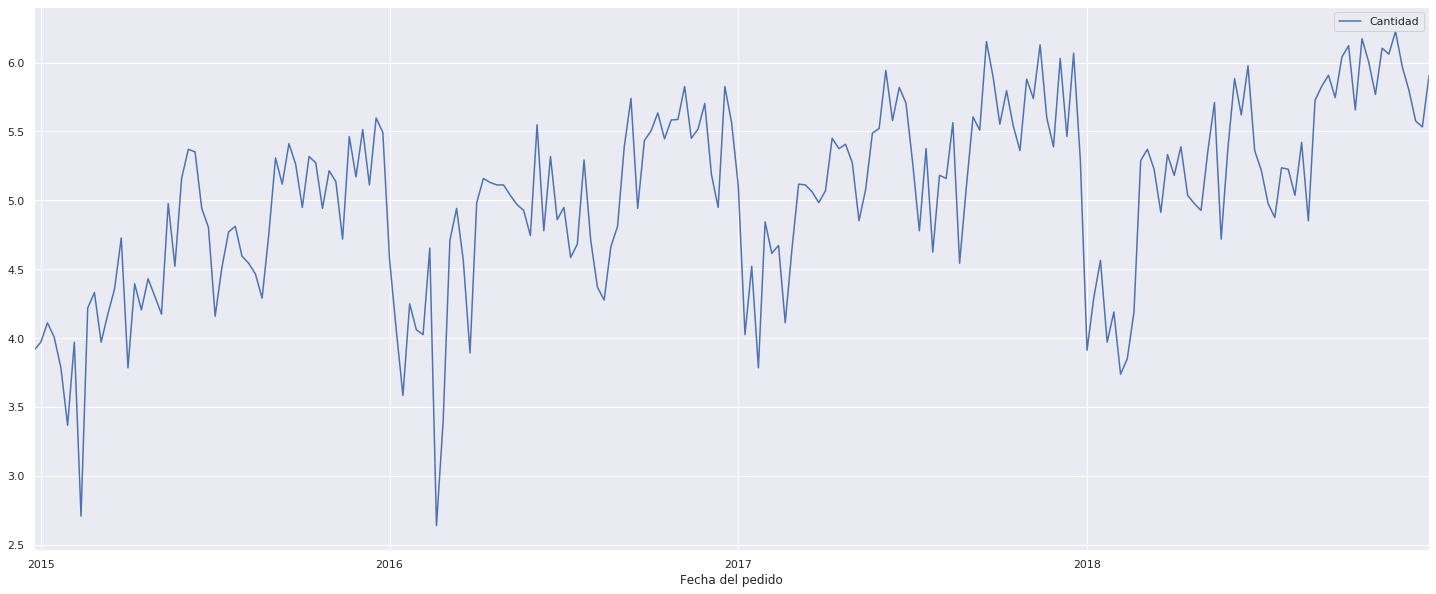

In [10]:
np.log(data2).plot()

In [10]:
stl = decompose(np.log(data2), period=52, lo_frac=0.2)

In [43]:
stl

In [22]:
sa_act = (stl.resid + stl.trend)
adj_pv = stl.seasonal.Cantidad.values[:26]
adj_oi = stl.seasonal.Cantidad.values[27:53]

In [23]:
stl.trend

Cantidad
Fecha del pedido          
2014-12-29        3.822453
2015-01-05        3.858361
2015-01-12        3.894269
2015-01-19        3.930131
2015-01-26        3.965993
...                    ...
2018-11-26        5.940338
2018-12-03        5.966277
2018-12-10        5.992215
2018-12-17        6.017672
2018-12-24        6.042749

[209 rows x 1 columns]

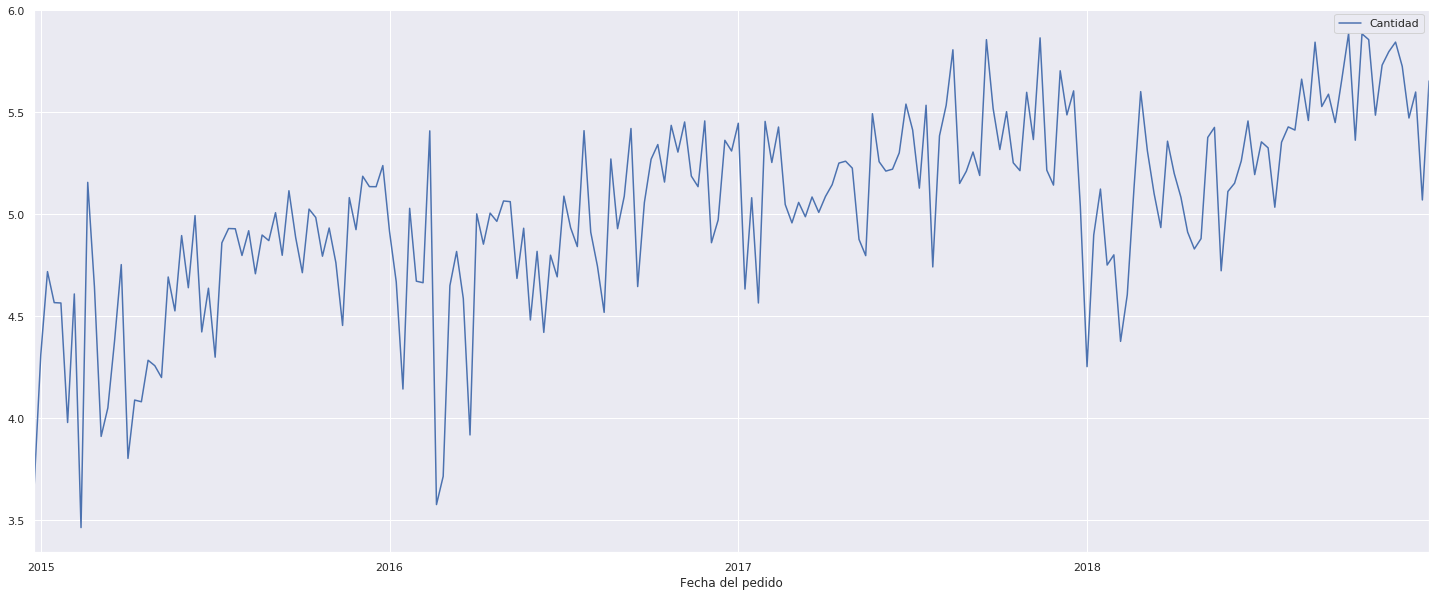

In [24]:
sa_act.plot()

In [25]:
sa_act.to_csv("data_retail.csv")

In [15]:
cv_arima = arima_model.ARIMA(sa_act, order=(2,1,1), freq='W-MON')
cv_fit = cv_arima.fit()

In [ ]:
# Esto debe cambiarse al inicio de cada temporada
season_start_date = pd.Timestamp('2018-12-31')

In [ ]:
n_semanas_pasaron = int((act.index.max() - season_start_date).days/7)

In [16]:
n_preds = 26

In [17]:
forecast = cv_fit.forecast(n_preds)

In [18]:
forecast[0]

array([-0.24255128, -0.20471078, -0.19554126, -0.19393265, -0.19432079,
       -0.1952359 , -0.19629012, -0.19738106, -0.1984817 , -0.19958489,
       -0.20068876, -0.20179281, -0.20289691, -0.20400101, -0.20510512,
       -0.20620923, -0.20731335, -0.20841746, -0.20952157, -0.21062568,
       -0.21172979, -0.2128339 , -0.21393802, -0.21504213, -0.21614624,
       -0.21725035])

In [20]:
act_pred = (
    pd.DataFrame({'unadjusted_mean':forecast[0], 
              'error':forecast[1], 
              'lower_ci':forecast[2][:,0],
             'upper_ci':forecast[2][:,1],
             'estacionalidad':adj_pv[-n_preds:]})
            .assign(adjusted_mean = lambda x: x.estacionalidad + x.unadjusted_mean)
)

AttributeError: 'DataFrame' object has no attribute 'trend'

In [57]:
import pandas as pd
from pmprophet.model import PMProphet, Sampler

ModuleNotFoundError: No module named 'pmprophet'

In [11]:
#act = pd.read_csv("act_nn.csv")
#df = df.head(180)
df = data2

In [ ]:
# Fit both growth and intercept
m = PMProphet(df, growth=True, intercept=True, n_changepoints=20, changepoints_prior_scale=.001, name='model')

# Add monthly seasonality (order: 3)
m.add_seasonality(seasonality=52, fourier_order=3)

In [ ]:
# Add weekly seasonality (order: 3)
m.add_seasonality(seasonality=26, fourier_order=3)

In [ ]:
# Fit the model (using NUTS)
m.fit(method=Sampler.NUTS)

In [ ]:
ddf = m.predict(26, alpha=0.2, include_history=True, plot=True)
m.plot_components(intercept=False)

In [13]:
from fbprophet import Prophet

In [15]:
df = pd.read_csv('data_retail.csv')

In [16]:
# Python
m = Prophet(yearly_seasonality=True)
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/qsergio/miniconda3/envs/demanda/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [29]:
future = m.make_future_dataframe(periods=26,freq = 'w')
future.tail()

ds
230 2019-05-26
231 2019-06-02
232 2019-06-09
233 2019-06-16
234 2019-06-23

In [30]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds      yhat  yhat_lower  yhat_upper
0 2014-12-29  4.409993    4.012649    4.793519
1 2015-01-05  4.311177    3.923101    4.667120
2 2015-01-12  4.279703    3.915470    4.663628
3 2015-01-19  4.296485    3.892295    4.668788
4 2015-01-26  4.318190    3.918526    4.677011

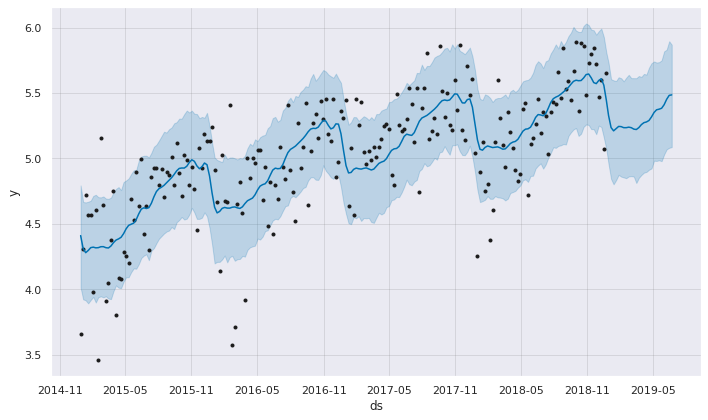

In [31]:
fig1 = m.plot(forecast)

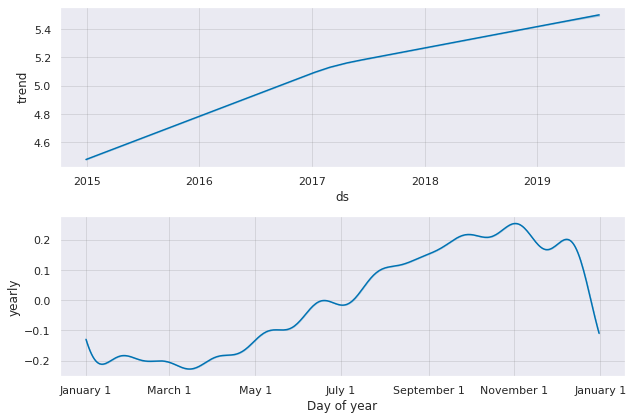

In [21]:
fig2 = m.plot_components(forecast)

In [25]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)


NameError: name 'go' is not defined

In [24]:
import plotly.graph_objs as go


In [ ]:
data2['Mes'] = data2.index.month
data2['Semana'] = data2.index.week
data2['Dia_semana'] = data2.index.day_name()

In [ ]:
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');

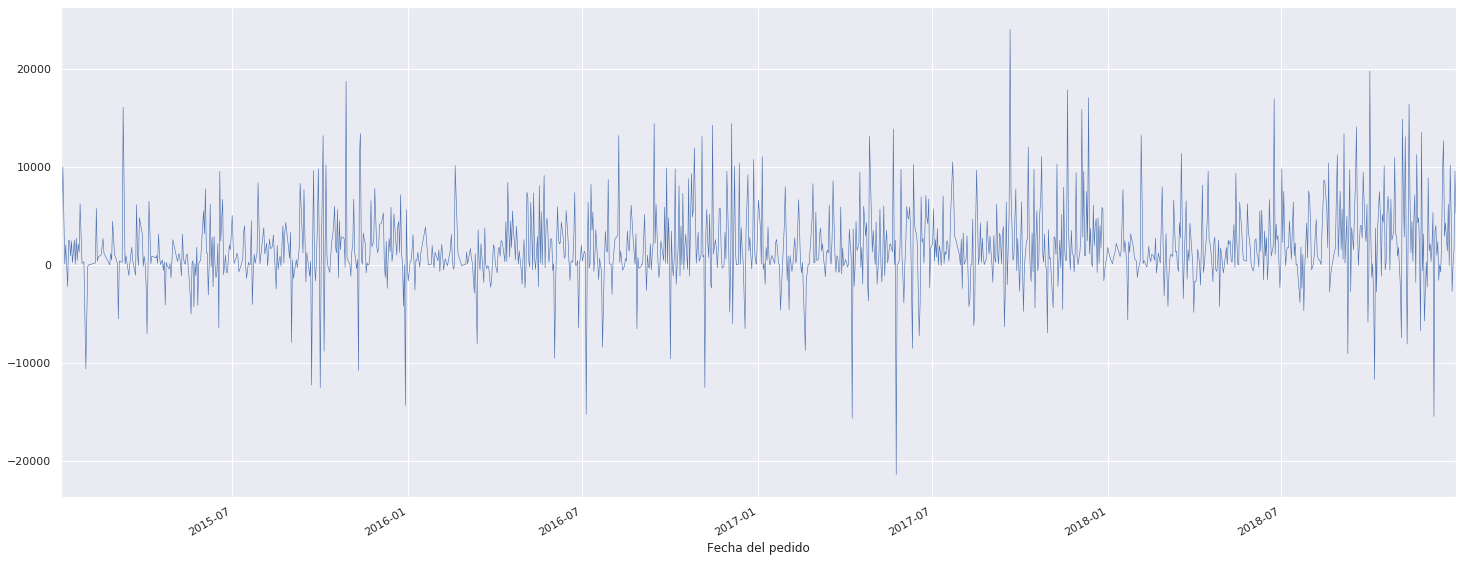

In [25]:
df_g = data.groupby("Fecha del pedido")['Ganancia'].sum()
df_g = pd.DataFrame({'Ganancia':df_g})
df_g['Ganancia'].plot(linewidth=0.6)

In [19]:
data1 = data.Anio.isin( ['2016','2017','2018'])
data1.head()

Fecha del pedido
2015-01-03    False
2015-01-04    False
2015-01-04    False
2015-01-04    False
2015-01-04    False
Name: Anio, dtype: bool

In [26]:
df = data1.groupby("Fecha del pedido")
df_cantidad = pd.DataFrame({'Cantidad':df})
#df_cantidad=df_cantidad.Anio.isin( ['2016','2017','2018'])
#df_cantidad.head()
df_cantidad['Cantidad'].plot(linewidth=0.55)

NameError: name 'data1' is not defined

In [24]:
df_cant2 = data.groupby(["Fecha del pedido","Semana"])[['Cantidad']].sum()

In [25]:
df_cant2.head

<bound method NDFrame.head of                          Cantidad
Fecha del pedido Semana          
2015-01-03       1              4
2015-01-04       1             38
2015-01-05       2              8
2015-01-07       2              7
2015-01-08       2             10
...                           ...
2018-12-27       52            61
2018-12-28       52             9
2018-12-29       52            92
2018-12-30       52            47
2018-12-31       1             52

[1224 rows x 1 columns]>

In [27]:
df_cantidad.loc['2017','Cantidad'].plot() #df_cantidad['Cantidad'].plot(linewidth=0.6)

NameError: name 'df_cantidad' is not defined

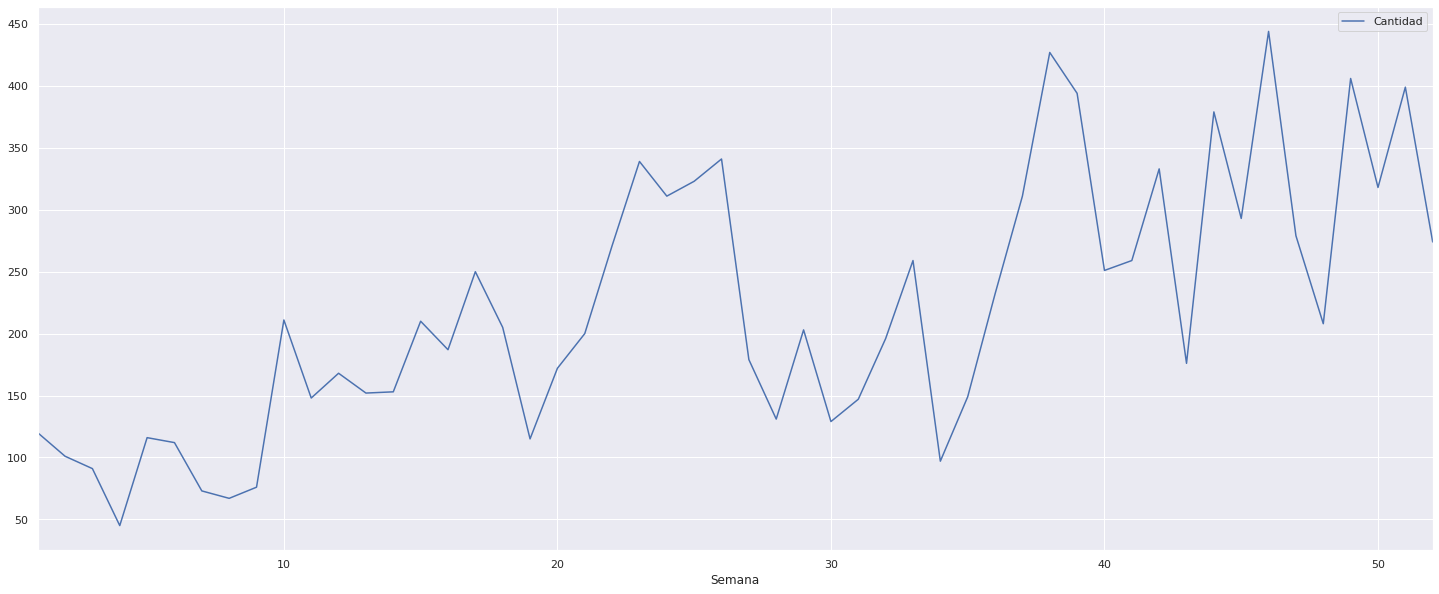

In [26]:
#data['Semana'] = data.index.week
data.loc['2017', ['Semana','Cantidad']].groupby(['Semana']).sum().plot()

In [114]:
data.head()

Id. de la fila  Id. del pedido Fecha de envío  \
Fecha del pedido                                                  
2015-01-03                  8187  MX-2015-160234     2015-01-07   
2015-01-04                 10118  US-2015-136007     2015-01-11   
2015-01-04                  1971  MX-2015-111255     2015-01-09   
2015-01-04                  1970  MX-2015-111255     2015-01-09   
2015-01-04                  9067  MX-2015-159373     2015-01-08   

                 Forma de envío Id. del cliente Nombre del cliente  \
Fecha del pedido                                                     
2015-01-03             Estándar        SC-20785      Sandra Crespo   
2015-01-04             Estándar        AH-11305  Ariadna Hernández   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04             Estándar        AC-10930   Anabel Caraballo   

                         Segmento             Ciudad            Estado  \
Fecha del pedido                                                         
2015-01-03                Cliente              Mixco         Guatemala   
2015-01-04        Pequeña empresa              Pilar           Alagoas   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04        Pequeña empresa   Santiago de Cuba  Santiago de Cuba   

                       País  ... Subcategoría  \
Fecha del pedido             ...                
2015-01-03        Guatemala  ...    Teléfonos   
2015-01-04           Brasil  ...       Sobres   
2015-01-04           Brasil  ...    Librerías   
2015-01-04           Brasil  ...  Suministros   
2015-01-04             Cuba  ...       Sobres   

                               Nombre del producto     Total Cantidad  \
Fecha del pedido                                                        
2015-01-03         Nokia Auriculares, Al por mayor   1952.00        4   
2015-01-04         Jiffy Sobres de uso interno, 50    743.04        6   
2015-01-04           Dania Librería clásica, Negro  16484.40        6   
2015-01-04                Fiskars Abrecartas, Azul   1489.60        8   
2015-01-04        Kraft Cierre adhesivo, Reciclado    385.80        3   

                 Descuento  Ganancia  Anio  Mes  Dia_semana  Semana  
Fecha del pedido                                                     
2015-01-03             0.0    448.80  2015    1    Saturday       1  
2015-01-04             0.6  -1078.56  2015    1      Sunday       1  
2015-01-04             0.0   6098.40  2015    1      Sunday       1  
2015-01-04             0.0    281.60  2015    1      Sunday       1  
2015-01-04             0.0     76.80  2015    1      Sunday       1  

[5 rows x 23 columns]

In [137]:
mu_dia = data.sort_values('Dia_semana').loc['2018',['Dia_semana','Cantidad']].reset_index().groupby('Dia_semana',as_index=False).mean()
mu_dia

Dia_semana  Cantidad
0     Friday  4.049180
1     Monday  3.515152
2   Saturday  3.760748
3     Sunday  3.721088
4   Thursday  3.759450
5    Tuesday  3.839934
6  Wednesday  3.744373

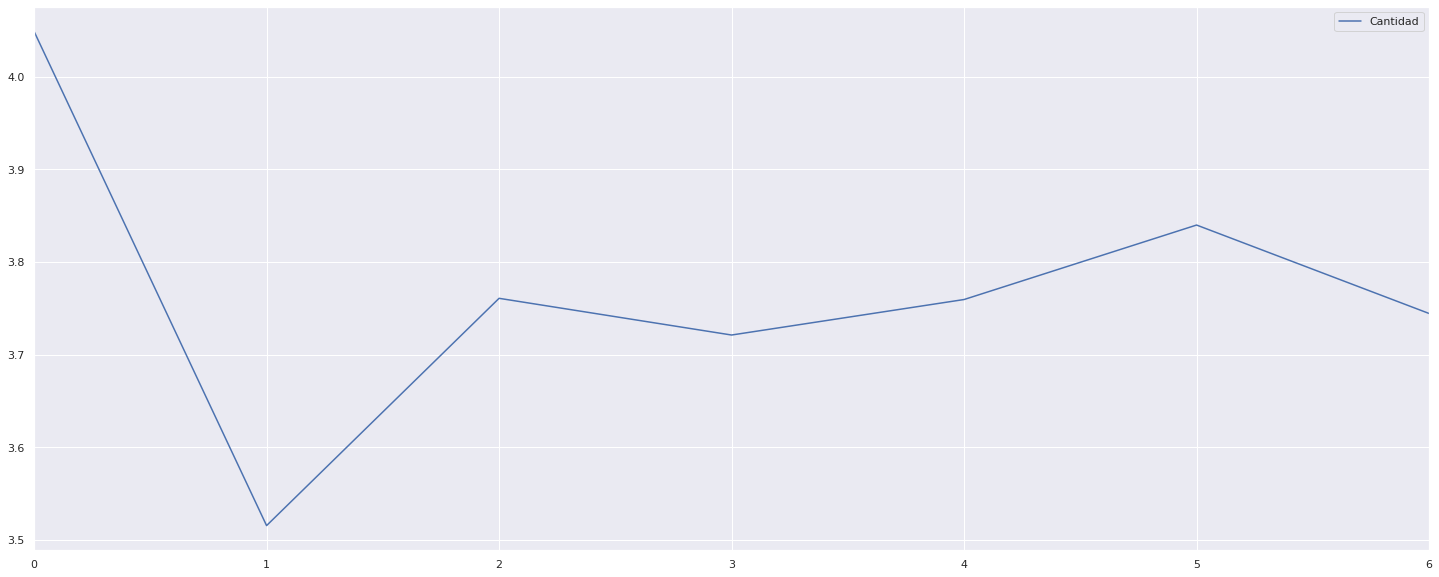

In [133]:
mu_dia.sort_index(axis=0).plot()

In [138]:
from pandas.plotting import autocorrelation_plot

In [139]:
df_cantidad.head()

Cantidad
Fecha del pedido          
2015-01-03               4
2015-01-04              38
2015-01-05               8
2015-01-07               7
2015-01-08              10

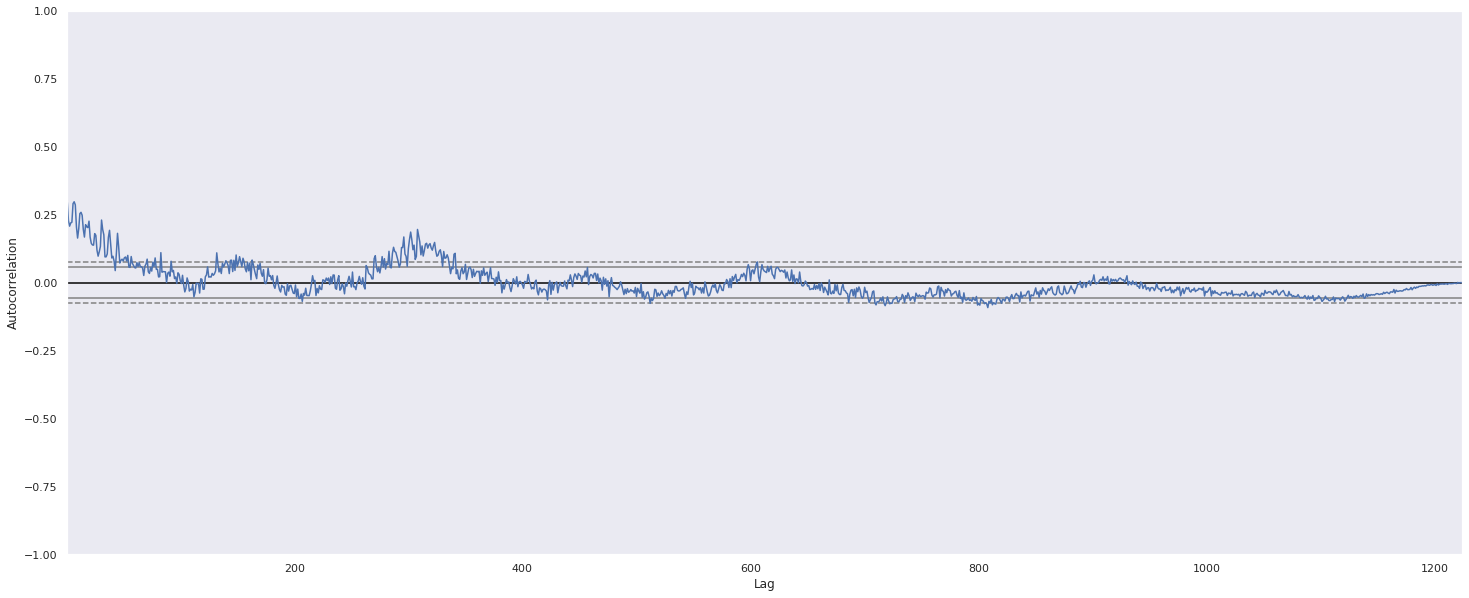

In [140]:
autocorrelation_plot(df_cantidad.Cantidad)

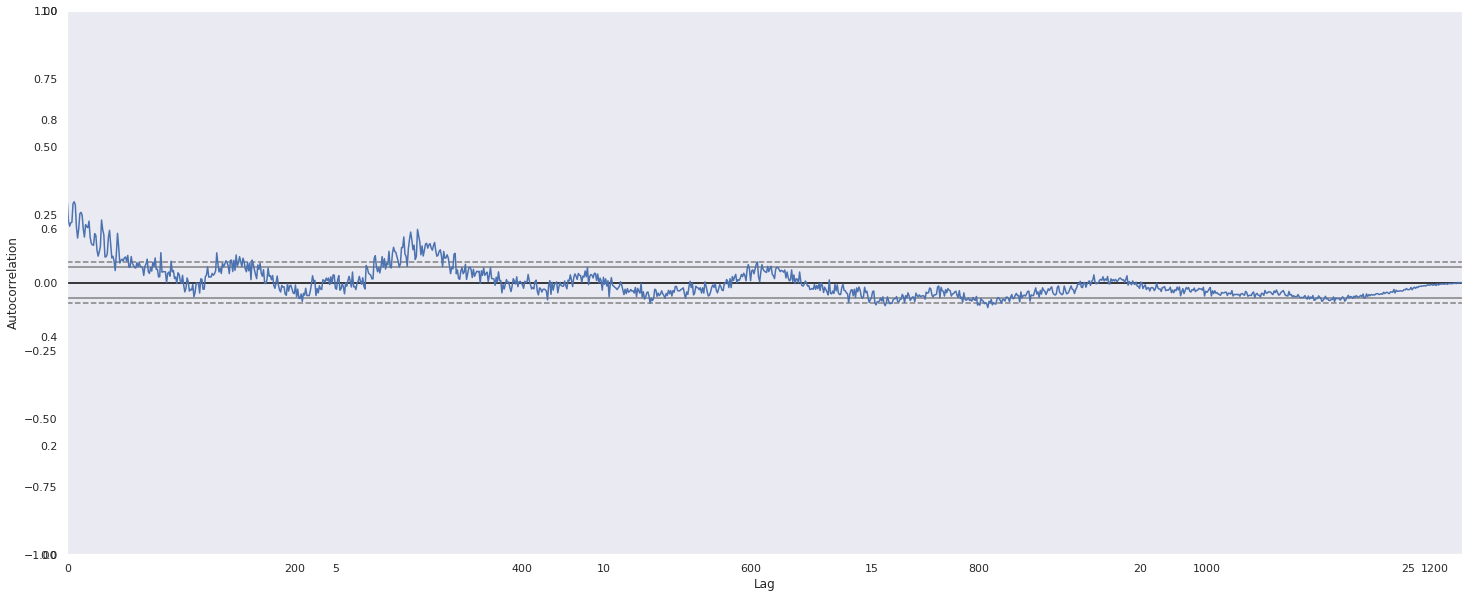

In [147]:
fig, ax= plt.subplots();
autocorrelation_plot(df_cantidad.Cantidad)
ax.set_xlim(0,26);

In [48]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [31]:
45

45